In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/spam.csv',encoding="ISO-8859-1")

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1274,ham,Let me know how to contact you. I've you settl...,NaN,NaN,NaN
5353,ham,Guai... ÌÏ shd haf seen him when he's naughty....,NaN,NaN,NaN
121,ham,here is my new address -apples&pairs&all that ...,NaN,NaN,NaN
3598,ham,Then wat r u doing now? Busy wif work?,NaN,NaN,NaN
2300,ham,Nothin comes to my mind. ÌÏ help me buy hanger...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

1.Data cleaning

2.EDA

3.Text preprocessing

4.Model building

5.Evaluation

6.Improvement

7.Website

8.Deployment

##1.Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
# axis and inplace perform same task
#The inplace parameter in the drop() function of Pandas controls whether the changes to the DataFrame are made in place or not. If inplace=True, the changes to the DataFrame are made in place, which means that the original DataFrame is modified. If inplace=False, a new DataFrame is returned with the specified changes, and the original DataFrame is not modified.
#The axis parameter in the drop() function controls which axis of the DataFrame the columns are dropped from. If axis=0, the rows are dropped. If axis=1, the columns are dropped.

In [8]:
# renaming the column
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [9]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# instead of ham and spam we want numbers , so we are going to use label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# duplicate values
df.duplicated().sum()

403

In [15]:
# remove duplicates
df=df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

##2. EDA

In [18]:
# what percent of data is spam and what percent is ham
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

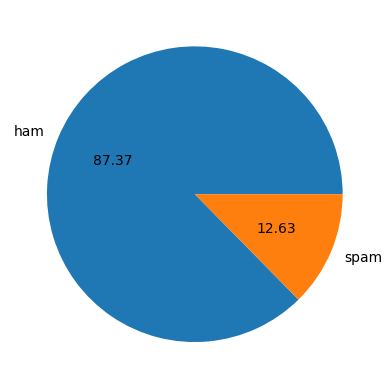

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

Data is imbalenced

In [20]:
!pip install nltk

In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
# we are creating three columns each represent number of characters,words in the particular sentence individually
# 1. number of characters in each sentence
df['num_characters'] = df['text'].apply(len)

In [24]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
# number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
# ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
# spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [31]:
# plot historgram for both the categories of data spam and ham
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

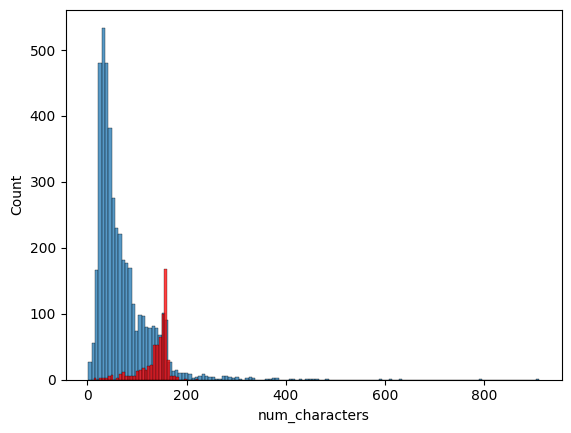

In [32]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

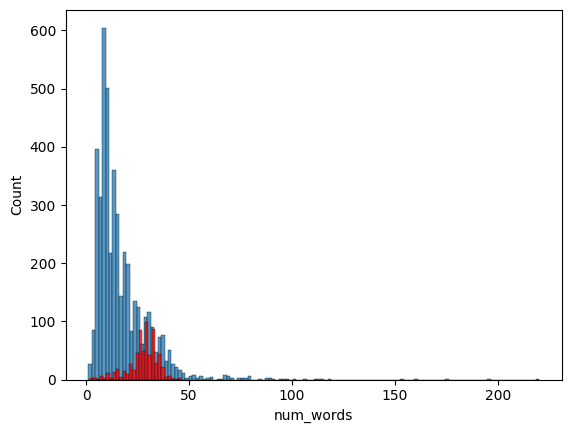

In [33]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

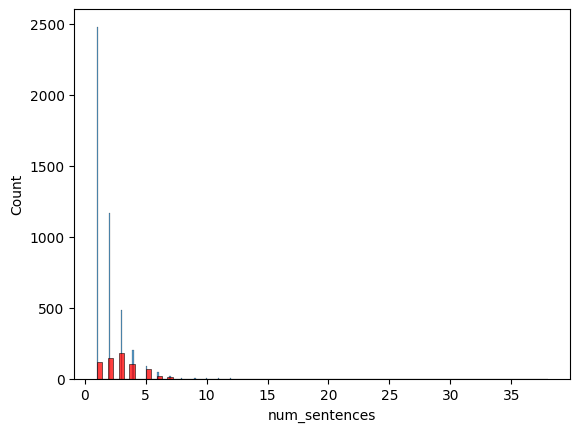

In [34]:
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='red')

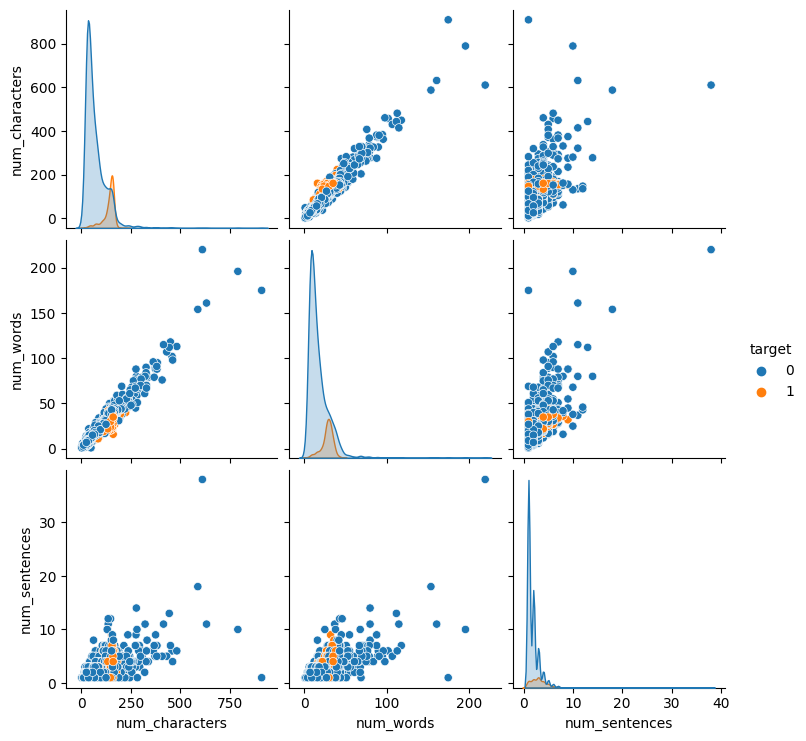

In [35]:
# to know the relationship between these columns
sns.pairplot(df,hue='target')

<ipython-input-36-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

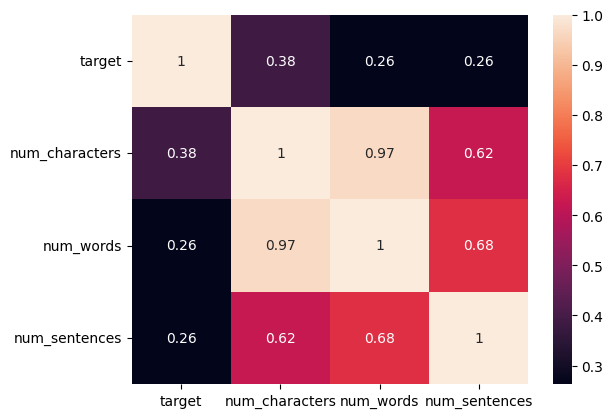

In [36]:
sns.heatmap(df.corr(),annot=True)

Due to multicollinearity ,i.e. these columns a re highly corelated to each other so we will use any one of these three

##3. Data-Preprocessing

. lowercase

. Tokenization

. Removing special characters

. Removing stopwords and punctuation

. Stemming

In [37]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text  = y[:]  # cloning
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text  = y[:]  # cloning
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [38]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [39]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [40]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [41]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [42]:
df['transformed_text'] = df['text'].apply(transform_text)

In [43]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [44]:
# now we will create the word cloud of ham and spam
from wordcloud import WordCloud

In [45]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [46]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

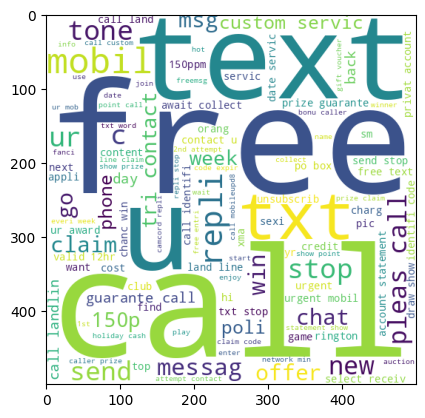

In [47]:
plt.imshow(spam_wc)

In [48]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

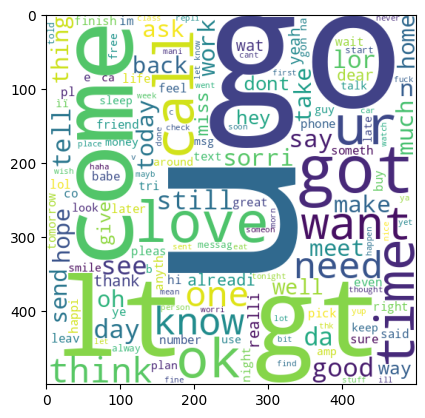

In [49]:
plt.imshow(ham_wc)

In [50]:
# finding the top 30 words of ham and spam


spam_corpus= []
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [51]:
len(spam_corpus)

9939

In [52]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [53]:
ham_corpus= []
for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [54]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('u', 1002),
 ('call', 553),
 ('2', 439),
 ('go', 436),
 ('get', 423),
 ('ur', 316),
 ('gt', 288),
 ('lt', 287),
 ('come', 280),
 ('know', 255),
 ('4', 253),
 ('free', 246),
 ('like', 246),
 ('got', 242),
 ('want', 239),
 ('time', 237),
 ('love', 226),
 ('good', 225),
 ('ok', 222),
 ('day', 216),
 ('text', 207),
 ('need', 181),
 ('send', 180),
 ('one', 175),
 ('see', 163),
 ('think', 160),
 ('take', 159),
 ('lor', 159),
 ('today', 156),
 ('txt', 154)]

##Model Building

we will use naive bayes classifier coz this perform better on textual data

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [56]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [57]:
X.shape

(5169, 6708)

In [58]:
Y=df['target'].values

In [59]:
Y.shape

(5169,)

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [61]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB

In [62]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [63]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [64]:
gnb.fit(x_train,y_train)

GaussianNB()

In [65]:
y1 = gnb.predict(x_test)

In [66]:
print(accuracy_score(y_test,y1))
print(precision_score(y_test,y1))
print(confusion_matrix(y_test,y1))

0.8800773694390716
0.5315315315315315
[[792 104]
 [ 20 118]]


In [67]:
mnb.fit(x_train,y_train)
y1 = mnb.predict(x_test)
print(accuracy_score(y_test,y1))
print(precision_score(y_test,y1))
print(confusion_matrix(y_test,y1))

0.9642166344294004
0.8344370860927153
[[871  25]
 [ 12 126]]


In [68]:
bnb.fit(x_train,y_train)
y1 = bnb.predict(x_test)
print(accuracy_score(y_test,y1))
print(precision_score(y_test,y1))
print(confusion_matrix(y_test,y1))

0.9700193423597679
0.9734513274336283
[[893   3]
 [ 28 110]]


In [69]:
# instead of using count vectorizer we can use TfIdf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [70]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [71]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [72]:
Y=df['target'].values

In [73]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [74]:
gnb.fit(x_train,y_train)
y1 = gnb.predict(x_test)
print(accuracy_score(y_test,y1))
print(precision_score(y_test,y1))
print(confusion_matrix(y_test,y1))

0.8694390715667312
0.5068493150684932
[[788 108]
 [ 27 111]]


In [75]:
mnb.fit(x_train,y_train)
y1 = mnb.predict(x_test)
print(accuracy_score(y_test,y1))
print(precision_score(y_test,y1))
print(confusion_matrix(y_test,y1))

0.9709864603481625
1.0
[[896   0]
 [ 30 108]]


In [76]:
bnb.fit(x_train,y_train)
y1 = bnb.predict(x_test)
print(accuracy_score(y_test,y1))
print(precision_score(y_test,y1))
print(confusion_matrix(y_test,y1))

0.9835589941972921
0.991869918699187
[[895   1]
 [ 16 122]]


Based on the above experiments we will keep tfidfvectorizer and mnb model

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [78]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [79]:
# making dictionary of these objects
clfs = {
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [80]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)
  return accuracy,precision

In [81]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
  current_accuracy,current_precision = train_classifier(clf,x_train,y_train,x_test,y_test)

  print('for',name)
  print('accuracy',current_accuracy)
  print('precision',current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)


for SVC
accuracy 0.9758220502901354
precision 0.9747899159663865
for KN
accuracy 0.9052224371373307
precision 1.0
for NB
accuracy 0.9709864603481625
precision 1.0
for DT
accuracy 0.9323017408123792
precision 0.8333333333333334
for LR
accuracy 0.9584139264990329
precision 0.9702970297029703
for RF
accuracy 0.9758220502901354
precision 0.9829059829059829
for AdaBoost
accuracy 0.960348162475822
precision 0.9292035398230089
for BgC
accuracy 0.9584139264990329
precision 0.8682170542635659
for ETC
accuracy 0.9748549323017408
precision 0.9745762711864406
for GBDT
accuracy 0.9468085106382979
precision 0.9191919191919192
for xgb
accuracy 0.9671179883945842
precision 0.9262295081967213


In [82]:
# converting the above result into dataframe
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [83]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


Pickle is often used to store Python objects in files. This can be useful for saving the state of a program or for storing data that needs to be loaded later. Pickle is also often used to transfer Python objects over the network. This can be useful for sending data to a remote server or for sharing data with other Python programs

In [84]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
